**Домашнее задание «Модели ARMA»**

In [42]:
!pip install pmdarima

In [43]:
!pip install arch

In [44]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
from pmdarima import auto_arima
from arch import arch_model

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [47]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [48]:
temp = pd.read_csv('temp.csv')

In [49]:
temp.shape

(240, 2)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


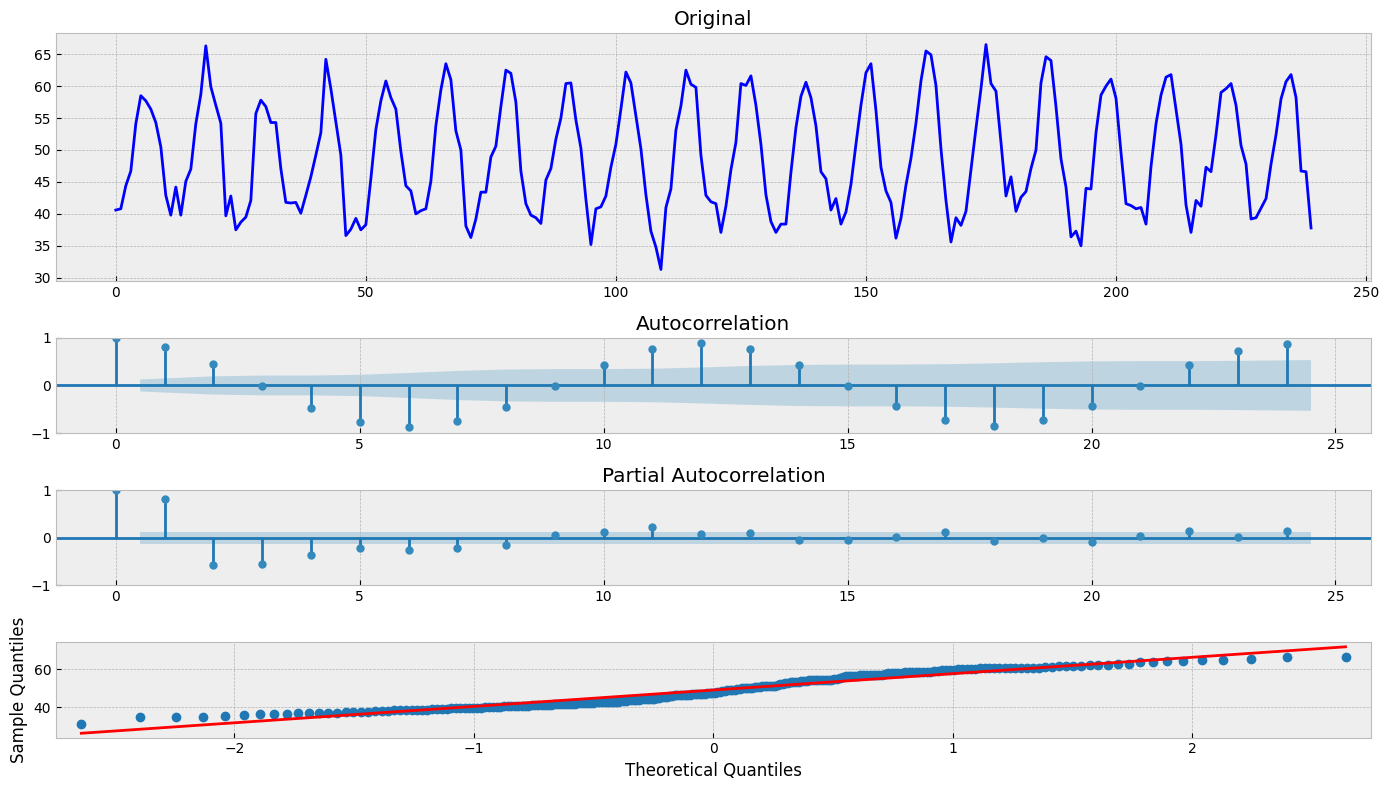

In [50]:
tsplot(temp['Deg'])

In [51]:
series = boxcox(temp['Deg'], 0)
series = np.diff(series, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.513025e+01
p-value                        7.248952e-28
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


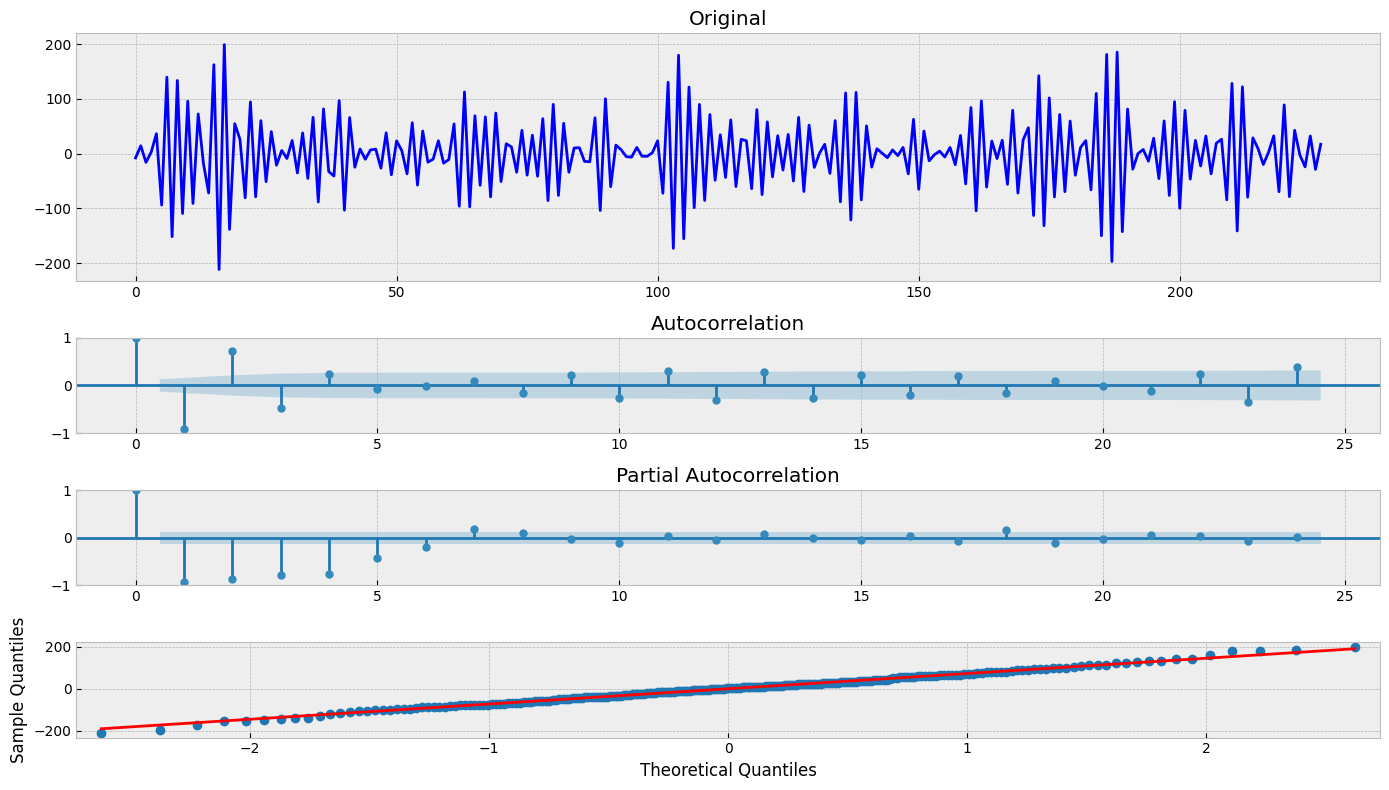

In [52]:
tsplot(series)

In [53]:
# Попробуем определить модель с помощью ARIMA и предсказать несколько значений

In [54]:
#Найдём лучшую модель

In [55]:
model_best = auto_arima(series, trace=True, suppress_warnings=True)
model_best.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2604.142, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2176.631, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2602.142, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1869.608, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1654.056, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1436.741, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1323.478, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1321.478, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1434.741, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=2.85 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.35 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -654.739
Date:                Tue, 12 Sep 2023   AIC                           1321.478
Time:                        10:22:51   BIC                           1342.054
Sample:                             0   HQIC                          1329.780
                                - 228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.5156      0.049    -71.461      0.000      -3.612      -3.419
ar.L2         -5.6560      0.153    -36.907      0.000      -5.956      -5.356
ar.L3         -5.1911      0.213    -24.335      0.000      -5.609      -4.773
ar.L4         -2.7102      0.155    -17.535      0.000      -3.013      -2.407
ar.L5         -0.6396      0.050    -12.839      0.000      -0.737      -0.542
sigma2        17.1887      1.828      9.403      0.000      13.606      20.772
===================================================================================
Ljung-Box (L1) (Q):                  44.30   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.00   Prob(JB):                         0.38
Heteroskedasticity (H):               0.91   Skew:                             0.13
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model_best.order

(5, 0, 0)

In [57]:
arima_order = model_best.order

In [58]:
# Разделим модель на обучающую и тестовую выборки

In [59]:
train_size = int(len(series) * 0.9)
train, test = series[:train_size], series[train_size:]
train_size

205

In [60]:
print(train.shape, test.shape)

(205,) (23,)


In [61]:
# Обучим модель

In [62]:
model = smt.ARIMA(train, order = arima_order)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  205
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -590.895
Date:                Tue, 12 Sep 2023   AIC                           1195.791
Time:                        10:22:53   BIC                           1219.052
Sample:                             0   HQIC                          1205.199
                                - 205                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.016      0.072      0.943      -0.030       0.033
ar.L1         -3.5087      0.051    -69.050      0.000      -3.608      -3.409
ar.L2         -5.6436      0.158    -35.825      0.000      -5.952      -5.335
ar.L3         -5.1972      0.219    -23.725      0.000      -5.627      -4.768
ar.L4         -2.7289      0.159    -17.121      0.000      -3.041      -2.417
ar.L5         -0.6467      0.052    -12.461      0.000      -0.748      -0.545
sigma2        17.4388      1.952      8.933      0.000      13.613      21.265
===================================================================================
Ljung-Box (L1) (Q):                  40.47   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.00   Prob(JB):                         0.45
Heteroskedasticity (H):               0.86   Skew:                             0.14
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Results of Dickey-Fuller Test:
Test Statistic                -1.723603e+01
p-value                        6.149618e-30
#Lags Used                     1.500000e+01
Number of Observations Used    1.890000e+02
Critical Value (1%)           -3.465431e+00
Critical Value (5%)           -2.876957e+00
Critical Value (10%)          -2.574988e+00
dtype: float64


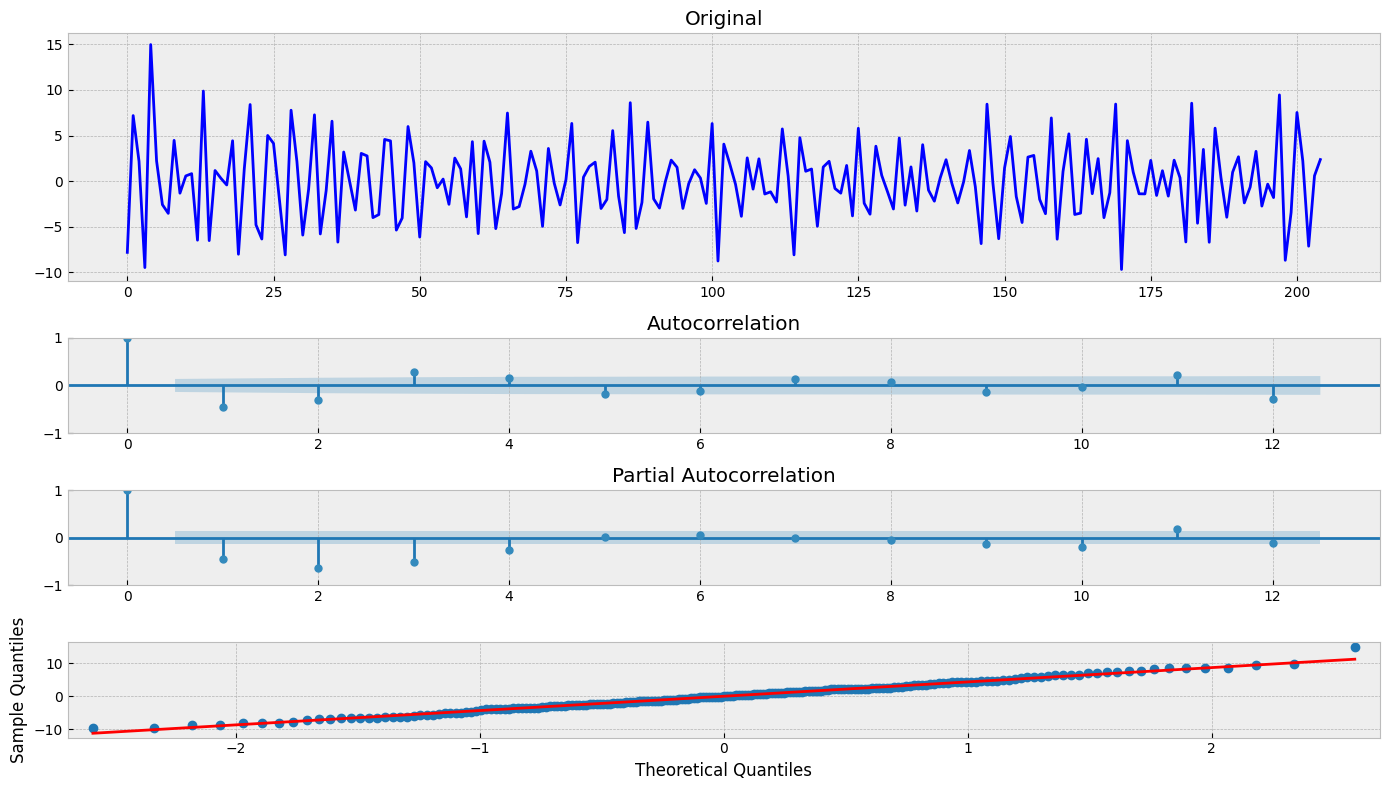

In [63]:
tsplot(model.resid, lags=12)

In [64]:
model.predict().shape

(205,)

In [65]:
model.forecast()[0]

30.995672689940594

In [66]:
predictions = model.predict(start=train.shape[0],
                            end=(train.shape[0] + test.shape[0]-1))
print(train.shape[0])
print(test.shape[0])
print(predictions.shape)

205
23
(23,)


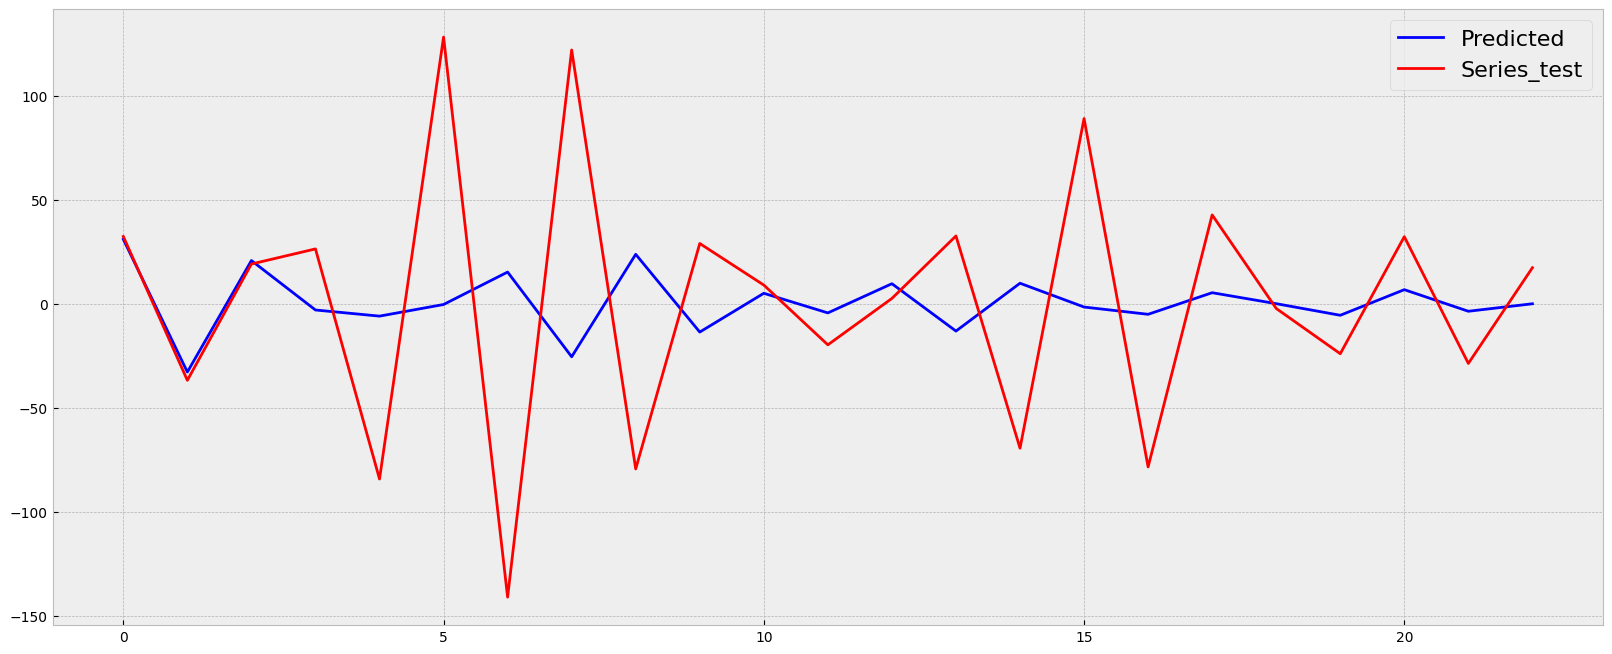

In [67]:
with plt.style.context('bmh'):
    plt.figure(figsize=(20,8))
    plt.plot(predictions, color='blue', label='Predicted')
    plt.plot(test, color='red', label='Series_test')
    plt.legend(prop={'size':16})
    plt.show()

In [68]:
# Вначале модель предсказвает довольно точно, затем начинает ошибаться.

In [69]:
error = mean_squared_error(test, predictions)
error

4687.957639272567

In [70]:
#GARCH

In [71]:
# Now we can fit the arch model using the best fit arima model parameters
p_ = arima_order[0]
o_ = arima_order[1]
q_ = arima_order[2]

# Using student T distribution usually provides better fit
am = arch_model(train, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -1108.93
Distribution:      Standardized Student's t   AIC:                           2233.86
Method:                  Maximum Likelihood   BIC:                           2260.45
                                              No. Observations:                  205
Date:                      Tue, Sep 12 2023   Df Residuals:                      204
Time:                              10:22:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

Results of Dickey-Fuller Test:
Test Statistic                -1.394551e+01
p-value                        4.805483e-26
#Lags Used                     1.500000e+01
Number of Observations Used    1.890000e+02
Critical Value (1%)           -3.465431e+00
Critical Value (5%)           -2.876957e+00
Critical Value (10%)          -2.574988e+00
dtype: float64


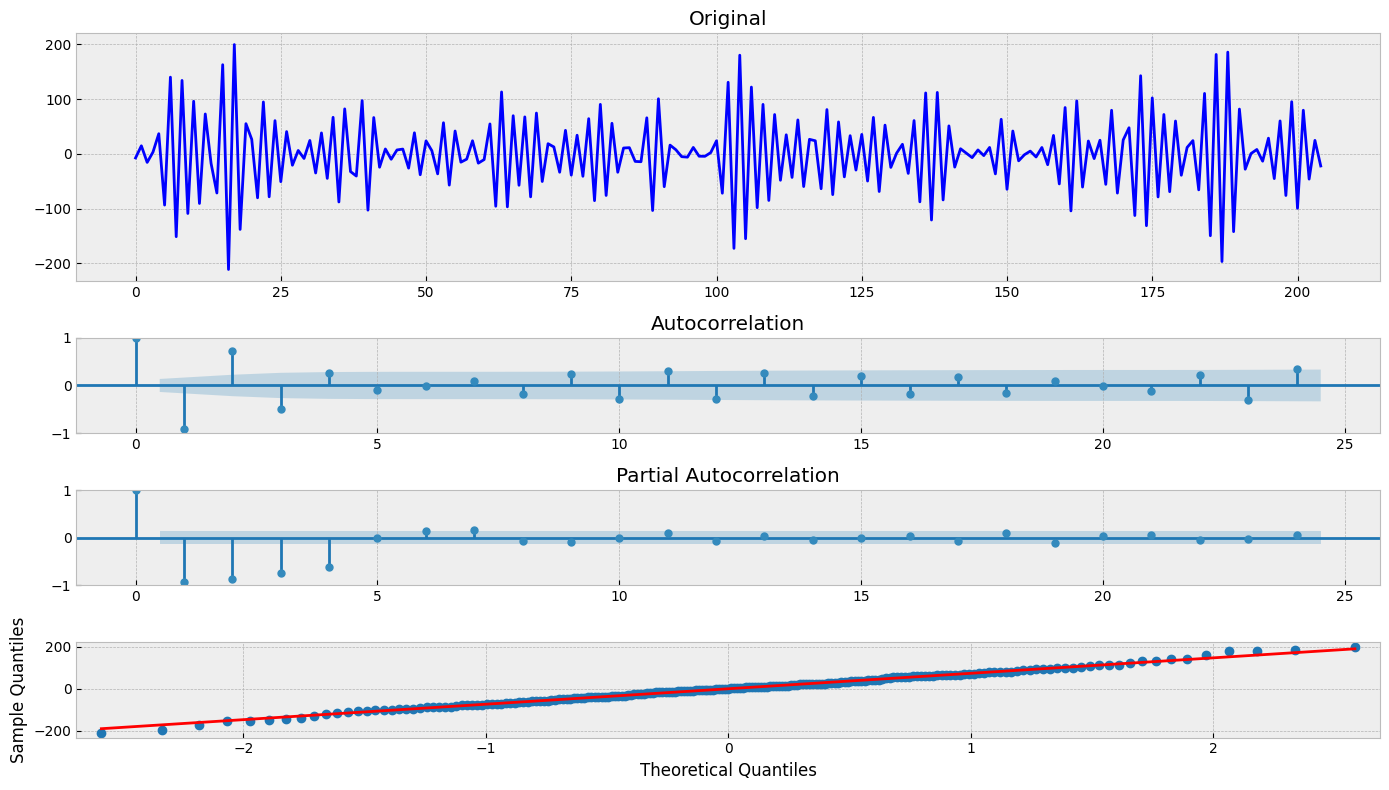

In [72]:
tsplot(res.resid)

In [73]:
pred = res.forecast(horizon=len(test), reindex = False)

In [74]:
forecast = train.copy()
forecast = np.concatenate((forecast, pred.variance.values[-1, :]))

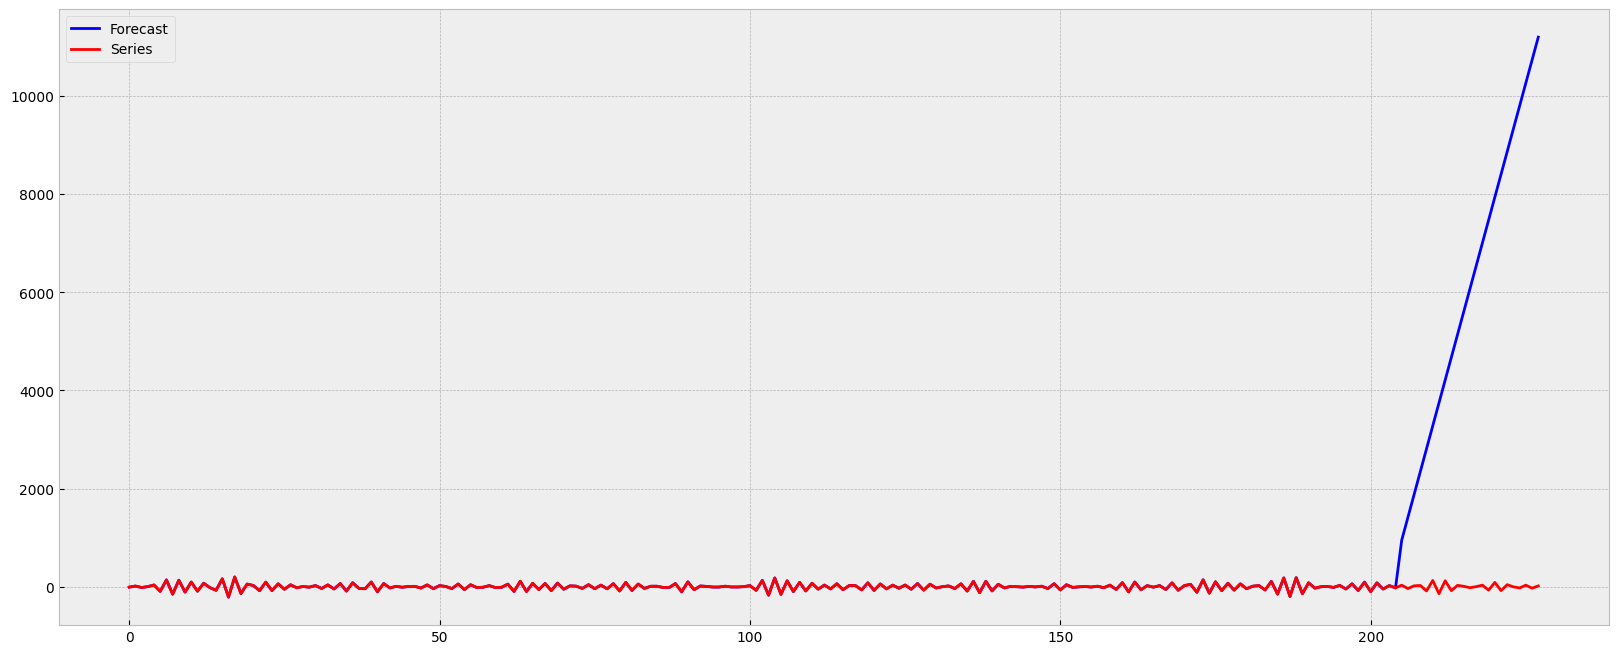

In [75]:
with plt.style.context('bmh'):
    plt.figure(figsize=(20,8))
    ax = plt.axes()
    plt.plot(forecast, color='blue', label='Forecast')
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()